Analisis Pengaruh Literasi Digital dan Akses Internet terhadap Partisipasi Pendidikan di Indonesia Tahun 2022


# **A. Tahap pengambilan & intergrasi data**

In [309]:
import pandas as pd
import numpy as np

In [310]:
litdig = pd.read_csv("/content/indeks literasi digital-2022.csv")
aps    = pd.read_csv("/content/Angka Partisipasi Sekolah (APS)-2022.csv", sep=";")

In [311]:
akses  = pd.read_csv("/content/Akses Internet-2022.csv", header=[0,1])
akses.columns = ['Provinsi', 'Perkotaan', 'Pedesaan', 'Gabungan']
akses = akses.dropna(subset=['Provinsi'])
akses = akses[~akses['Provinsi'].str.contains('Indonesia', na=False)]

In [312]:
#akses.columns = ['_'.join(col).strip() for col in akses.columns.values]

In [313]:
litdig.head()

,id,kode_provinsi,nama_provinsi,indeks_literasi_digital,satuan,tahun
0,69,11,ACEH,3.53,POIN,2022
1,70,12,SUMATERA UTARA,3.46,POIN,2022
2,71,13,SUMATERA BARAT,3.53,POIN,2022
3,72,14,RIAU,3.33,POIN,2022
4,73,15,JAMBI,3.54,POIN,2022


In [314]:
akses.head()

,Provinsi,Perkotaan,Pedesaan,Gabungan
2,ACEH,85.64,76.86,79.85
3,SUMATERA UTARA,89.95,82.3,86.61
4,SUMATERA BARAT,91.71,83.41,87.52
5,RIAU,93.93,89.05,91.01
6,JAMBI,92.2,85.04,87.34


In [315]:
aps.head()

,No,Cakupan,Satuan,Kelompok Umur 7-12,Kelompok Umur 13-15,Kelompok Umur 16-18
0,1,ACEH,%,"99,810","98,790","87,820"
1,2,SUMATERA UTARA,%,"99,690","97,190","79,260"
2,3,SUMATERA BARAT,%,"99,340","96,760","88,840"
3,4,RIAU,%,"99,640","96,680","82,600"
4,5,JAMBI,%,"99,430","94,800","80,990"


In [316]:
litdig = litdig.rename(columns={'nama_provinsi': 'Provinsi', 'indeks_literasi_digital': 'Indeks_Literasi_Digital'})
akses = akses.rename(columns={'Provinsi': 'Provinsi', 'Perkotaan': 'Akses_Perkotaan', 'Pedesaan': 'Akses_Pedesaan',
                              'Gabungan': 'Persentase_Akses_Internet'})
aps = aps.rename(columns={'Cakupan': 'Provinsi', 'Kelompok Umur 7-12': 'APS 7-12 Tahun',
                          'Kelompok Umur 13-15': 'APS 13-15 Tahun', 'Kelompok Umur 16-18': 'APS 16-18 Tahun'})

In [317]:
print("Kolom literasi digital:", litdig.columns.tolist())
print("Kolom akses internet:", akses.columns.tolist())
print("Kolom APS:", aps.columns.tolist())

Kolom literasi digital: ['id', 'kode_provinsi', 'Provinsi', 'Indeks_Literasi_Digital', 'satuan', 'tahun']
Kolom akses internet: ['Provinsi', 'Akses_Perkotaan', 'Akses_Pedesaan', 'Persentase_Akses_Internet']
Kolom APS: ['No', 'Provinsi', 'Satuan', 'APS 7-12 Tahun', 'APS 13-15 Tahun', 'APS 16-18 Tahun']


In [318]:
#Standarisasi Nama Provinsi
for df in [litdig, akses, aps]:
    df["Provinsi"] = (
        df["Provinsi"].astype(str)
        .str.strip()
        .str.replace("Dki", "DKI")
        .str.replace("Di ", "DI ")
        .str.title()
    )

In [319]:
# Normalisasi nama-nama khusus antar dataset
def norm_prov(p):
    mapping = {
        "Kep. Riau": "Kepulauan Riau",
        "Kep. Bangka Belitung": "Kepulauan Bangka Belitung",
        "Indonesia": None
    }
    return mapping.get(p, p)

In [320]:
for df in [litdig, akses, aps]:
    df['Provinsi'] = df['Provinsi'].apply(norm_prov)
    df.dropna(subset=['Provinsi'], inplace=True)
    df.drop_duplicates(subset=['Provinsi'], inplace=True)

In [321]:
# perbaikan format APS
for col in ["APS 7-12 Tahun", "APS 13-15 Tahun", "APS 16-18 Tahun"]:
    aps[col] = aps[col].astype(str).str.replace(",", ".").astype(float)

# Hitung rata-rata APS
aps["APS_Rata2"] = aps[["APS 7-12 Tahun", "APS 13-15 Tahun", "APS 16-18 Tahun"]].mean(axis=1)


In [322]:
merged = pd.merge(litdig, akses, on='Provinsi', how='outer')
merged = pd.merge(merged, aps, on='Provinsi', how='outer')
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         34 non-null     float64
 1   kode_provinsi              34 non-null     float64
 2   Provinsi                   38 non-null     object 
 3   Indeks_Literasi_Digital    34 non-null     float64
 4   satuan                     34 non-null     object 
 5   tahun                      34 non-null     float64
 6   Akses_Perkotaan            38 non-null     object 
 7   Akses_Pedesaan             38 non-null     object 
 8   Persentase_Akses_Internet  38 non-null     object 
 9   No                         38 non-null     int64  
 10  Satuan                     38 non-null     object 
 11  APS 7-12 Tahun             34 non-null     float64
 12  APS 13-15 Tahun            34 non-null     float64
 13  APS 16-18 Tahun            34 non-null     float64
 

In [323]:

pd.options.display.float_format = "{:.2f}".format
merged.head(38)

,id,kode_provinsi,Provinsi,Indeks_Literasi_Digital,satuan,tahun,Akses_Perkotaan,Akses_Pedesaan,Persentase_Akses_Internet,No,Satuan,APS 7-12 Tahun,APS 13-15 Tahun,APS 16-18 Tahun,APS_Rata2
0,69.00,11.00,Aceh,3.53,POIN,2022.00,85.64,76.86,79.85,1,%,99.81,98.79,87.82,95.47
1,85.00,51.00,Bali,3.45,POIN,2022.00,93.78,85.09,91.21,17,%,99.62,98.16,85.16,94.31
2,84.00,36.00,Banten,3.48,POIN,2022.00,93.84,82.77,91.11,16,%,99.24,97.03,72.10,89.46
3,75.00,17.00,Bengkulu,3.55,POIN,2022.00,93.23,83.15,86.43,7,%,98.69,97.87,84.23,93.60
4,82.00,34.00,Di Yogyakarta,3.64,POIN,2022.00,90.58,84.09,89.03,14,%,99.67,99.19,93.13,97.33
5,79.00,31.00,Dki Jakarta,3.59,POIN,2022.00,95.39,0,95.39,11,%,99.44,97.95,72.10,89.83
6,97.00,75.00,Gorontalo,3.35,POIN,2022.00,89.85,82.05,85.52,29,%,99.36,95.09,77.20,90.55
7,73.00,15.00,Jambi,3.54,POIN,2022.00,92.2,85.04,87.34,5,%,99.43,94.80,80.99,91.74
8,80.00,32.00,Jawa Barat,3.60,POIN,2022.00,90.23,78.33,87.57,12,%,99.41,96.01,70.82,88.75
9,81.00,33.00,Jawa Tengah,3.61,POIN,2022.00,90.18,86.13,88.24,13,%,99.54,97.57,74.35,90.49


In [324]:
final_df = merged[[
    'Provinsi',
    'Indeks_Literasi_Digital',
    'Persentase_Akses_Internet',
    'APS 7-12 Tahun', 'APS 13-15 Tahun', 'APS 16-18 Tahun', 'APS_Rata2'
]].copy()

In [325]:
# Pastikan kolom berisi angka
final_df['Indeks_Literasi_Digital'] = pd.to_numeric(final_df['Indeks_Literasi_Digital'], errors='coerce')
final_df['Persentase_Akses_Internet'] = pd.to_numeric(final_df['Persentase_Akses_Internet'], errors='coerce')


In [326]:
final_df.to_csv('merged_data.csv', index=False)

tambah variabel Indeks Kesiapan Digital Pendidikan (standardisasi)

In [327]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final_df[['lit_z','net_z']] = scaler.fit_transform(
    final_df[['Indeks_Literasi_Digital','Persentase_Akses_Internet']]
)
final_df['Indeks_Kesiapan_Digital_Pendidikan'] = final_df[['lit_z','net_z']].mean(axis=1)


In [328]:
final_df['Kategori_Litdig'] = pd.cut(
    final_df['Indeks_Literasi_Digital'],
    bins=[0,3.45,3.52,3.59,4],
    labels=['Rendah','Sedang','baik','Tinggi']
)

In [329]:
final_df['Kategori_Internet'] = pd.cut(
    final_df['Persentase_Akses_Internet'],
    bins=[0,82.95,86.61,88.68,100],
    labels=['Rendah','Sedang','Baik','Tinggi']
)

In [330]:
final_df['Status_Kinerja'] = pd.cut(
    final_df['Indeks_Kesiapan_Digital_Pendidikan'],
    bins=[-999, -1.0, 0.0, 1.0, 999],
    labels=['Tertinggal','Berkembang','Maju','Sangat Maju']
)
#bins nya manut z-score yg sudah ada di atas (lit_z dan net_z)

In [331]:
final_df['APS_Rata2'] = pd.to_numeric(final_df['APS_Rata2'], errors='coerce')

q1 = final_df['APS_Rata2'].quantile(0.25)
q2 = final_df['APS_Rata2'].quantile(0.50)
q3 = final_df['APS_Rata2'].quantile(0.75)

final_df['Kategori_APS'] = pd.cut(
    final_df['APS_Rata2'],
    bins=[0, q1, q2, q3, 100],
    labels=['Rendah', 'Sedang', 'Baik', 'Tinggi'],
    include_lowest=True
)

In [332]:
final_df.head(38)

,Provinsi,Indeks_Literasi_Digital,Persentase_Akses_Internet,APS 7-12 Tahun,APS 13-15 Tahun,APS 16-18 Tahun,APS_Rata2,lit_z,net_z,Indeks_Kesiapan_Digital_Pendidikan,Kategori_Litdig,Kategori_Internet,Status_Kinerja,Kategori_APS
0,Aceh,3.53,79.85,99.81,98.79,87.82,95.47,0.27,-0.51,-0.12,baik,Rendah,Berkembang,Tinggi
1,Bali,3.45,91.21,99.62,98.16,85.16,94.31,-0.53,0.64,0.05,Rendah,Tinggi,Maju,Tinggi
2,Banten,3.48,91.11,99.24,97.03,72.10,89.46,-0.23,0.63,0.20,Sedang,Tinggi,Maju,Rendah
3,Bengkulu,3.55,86.43,98.69,97.87,84.23,93.60,0.47,0.16,0.31,baik,Sedang,Maju,Tinggi
4,Di Yogyakarta,3.64,89.03,99.67,99.19,93.13,97.33,1.36,0.42,0.89,Tinggi,Tinggi,Maju,Tinggi
5,Dki Jakarta,3.59,95.39,99.44,97.95,72.10,89.83,0.87,1.06,0.96,baik,Tinggi,Maju,Rendah
6,Gorontalo,3.35,85.52,99.36,95.09,77.20,90.55,-1.53,0.06,-0.73,Rendah,Sedang,Berkembang,Sedang
7,Jambi,3.54,87.34,99.43,94.80,80.99,91.74,0.37,0.25,0.31,baik,Baik,Maju,Baik
8,Jawa Barat,3.60,87.57,99.41,96.01,70.82,88.75,0.97,0.27,0.62,Tinggi,Baik,Maju,Rendah
9,Jawa Tengah,3.61,88.24,99.54,97.57,74.35,90.49,1.07,0.34,0.70,Tinggi,Baik,Maju,Sedang


# **B. TAHAP DATA CLEANING**

**1. investigation**

In [333]:
final_df.info()
final_df.describe()
final_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Provinsi                            38 non-null     object  
 1   Indeks_Literasi_Digital             34 non-null     float64 
 2   Persentase_Akses_Internet           34 non-null     float64 
 3   APS 7-12 Tahun                      34 non-null     float64 
 4   APS 13-15 Tahun                     34 non-null     float64 
 5   APS 16-18 Tahun                     34 non-null     float64 
 6   APS_Rata2                           34 non-null     float64 
 7   lit_z                               34 non-null     float64 
 8   net_z                               34 non-null     float64 
 9   Indeks_Kesiapan_Digital_Pendidikan  34 non-null     float64 
 10  Kategori_Litdig                     34 non-null     category
 11  Kategori_Internet                 

,0
Provinsi,0
Indeks_Literasi_Digital,4
Persentase_Akses_Internet,4
APS 7-12 Tahun,4
APS 13-15 Tahun,4
APS 16-18 Tahun,4
APS_Rata2,4
lit_z,4
net_z,4
Indeks_Kesiapan_Digital_Pendidikan,4


**2. Data Formatting**

In [334]:
# Standarkan nama provinsi
final_df['Provinsi'] = final_df['Provinsi'].str.strip().str.title()


**3. Finding Bad Data (duplicate & matching)**

In [335]:
# Cek apakah ada provinsi duplikat
final_df['Provinsi'].duplicated().sum()


np.int64(0)

**4. Handling Duplicate**

In [336]:
final_df.drop_duplicates(subset='Provinsi', inplace=True)


**5. Finding Missing Value**

In [337]:
final_df.isnull().sum()


,0
Provinsi,0
Indeks_Literasi_Digital,4
Persentase_Akses_Internet,4
APS 7-12 Tahun,4
APS 13-15 Tahun,4
APS 16-18 Tahun,4
APS_Rata2,4
lit_z,4
net_z,4
Indeks_Kesiapan_Digital_Pendidikan,4


**6. Handling Missing Value / Imputasi**

In [338]:
final_df.dropna(inplace=True)
#final_df.dropna(how='all',inplace=True)

**7. Finding Outlier (optional, pakai IQR)**

In [339]:
# Pastikan kolom numerik sebelum cari outlier
final_df['Persentase_Akses_Internet'] = pd.to_numeric(final_df['Persentase_Akses_Internet'], errors='coerce')

Q1 = final_df['Persentase_Akses_Internet'].quantile(0.25)
Q3 = final_df['Persentase_Akses_Internet'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = final_df[(final_df['Persentase_Akses_Internet'] < lower) |
                  (final_df['Persentase_Akses_Internet'] > upper)]
outliers


,Provinsi,Indeks_Literasi_Digital,Persentase_Akses_Internet,APS 7-12 Tahun,APS 13-15 Tahun,APS 16-18 Tahun,APS_Rata2,lit_z,net_z,Indeks_Kesiapan_Digital_Pendidikan,Kategori_Litdig,Kategori_Internet,Status_Kinerja,Kategori_APS
23,Papua,3.62,35.14,95.25,96.21,86.94,92.80,1.17,-5.01,-1.92,Tinggi,Rendah,Tertinggal,Baik


In [340]:
# Standardisasi label kategori
final_df['Kategori_Litdig'] = final_df['Kategori_Litdig'].astype(str).str.title()
final_df['Kategori_Internet'] = final_df['Kategori_Internet'].astype(str).str.title()
final_df['Status_Kinerja'] = final_df['Status_Kinerja'].astype(str).str.title()
final_df['Kategori_APS'] = final_df['Kategori_APS'].astype(str).str.title()


In [341]:
final_df.head(40)

,Provinsi,Indeks_Literasi_Digital,Persentase_Akses_Internet,APS 7-12 Tahun,APS 13-15 Tahun,APS 16-18 Tahun,APS_Rata2,lit_z,net_z,Indeks_Kesiapan_Digital_Pendidikan,Kategori_Litdig,Kategori_Internet,Status_Kinerja,Kategori_APS
0,Aceh,3.53,79.85,99.81,98.79,87.82,95.47,0.27,-0.51,-0.12,Baik,Rendah,Berkembang,Tinggi
1,Bali,3.45,91.21,99.62,98.16,85.16,94.31,-0.53,0.64,0.05,Rendah,Tinggi,Maju,Tinggi
2,Banten,3.48,91.11,99.24,97.03,72.10,89.46,-0.23,0.63,0.20,Sedang,Tinggi,Maju,Rendah
3,Bengkulu,3.55,86.43,98.69,97.87,84.23,93.60,0.47,0.16,0.31,Baik,Sedang,Maju,Tinggi
4,Di Yogyakarta,3.64,89.03,99.67,99.19,93.13,97.33,1.36,0.42,0.89,Tinggi,Tinggi,Maju,Tinggi
5,Dki Jakarta,3.59,95.39,99.44,97.95,72.10,89.83,0.87,1.06,0.96,Baik,Tinggi,Maju,Rendah
6,Gorontalo,3.35,85.52,99.36,95.09,77.20,90.55,-1.53,0.06,-0.73,Rendah,Sedang,Berkembang,Sedang
7,Jambi,3.54,87.34,99.43,94.80,80.99,91.74,0.37,0.25,0.31,Baik,Baik,Maju,Baik
8,Jawa Barat,3.60,87.57,99.41,96.01,70.82,88.75,0.97,0.27,0.62,Tinggi,Baik,Maju,Rendah
9,Jawa Tengah,3.61,88.24,99.54,97.57,74.35,90.49,1.07,0.34,0.70,Tinggi,Baik,Maju,Sedang


In [342]:
final_df.to_csv('processed_final_data.csv', index=False)

**8. Preprocessing (Encoding & Scaling)**

In [343]:
# Tahap 8: Preprocessing (scaling)

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [344]:
df_scal = final_df.copy()


In [345]:
num_cols = [
    'Indeks_Literasi_Digital',
'Persentase_Akses_Internet',
    'APS 7-12 Tahun',
   'APS 13-15 Tahun',
   'APS 16-18 Tahun',
    'APS_Rata2',
   'Indeks_Kesiapan_Digital_Pendidikan'
]

In [346]:
df_scal[num_cols] = scaler.fit_transform(df_scal[num_cols])

In [347]:
df_scal.head(38)

,Provinsi,Indeks_Literasi_Digital,Persentase_Akses_Internet,APS 7-12 Tahun,APS 13-15 Tahun,APS 16-18 Tahun,APS_Rata2,lit_z,net_z,Indeks_Kesiapan_Digital_Pendidikan,Kategori_Litdig,Kategori_Internet,Status_Kinerja,Kategori_APS
0,Aceh,0.27,-0.51,0.87,1.18,1.47,1.62,0.27,-0.51,-0.18,Baik,Rendah,Berkembang,Tinggi
1,Bali,-0.53,0.64,0.63,0.85,0.99,1.12,-0.53,0.64,0.08,Rendah,Tinggi,Maju,Tinggi
2,Banten,-0.23,0.63,0.16,0.25,-1.34,-1.00,-0.23,0.63,0.30,Sedang,Tinggi,Maju,Rendah
3,Bengkulu,0.47,0.16,-0.52,0.69,0.83,0.80,0.47,0.16,0.47,Baik,Sedang,Maju,Tinggi
4,Di Yogyakarta,1.36,0.42,0.69,1.39,2.41,2.43,1.36,0.42,1.34,Tinggi,Tinggi,Maju,Tinggi
5,Dki Jakarta,0.87,1.06,0.41,0.74,-1.34,-0.84,0.87,1.06,1.45,Baik,Tinggi,Maju,Rendah
6,Gorontalo,-1.53,0.06,0.31,-0.77,-0.43,-0.53,-1.53,0.06,-1.10,Rendah,Sedang,Berkembang,Sedang
7,Jambi,0.37,0.25,0.40,-0.93,0.25,-0.01,0.37,0.25,0.46,Baik,Baik,Maju,Baik
8,Jawa Barat,0.97,0.27,0.37,-0.29,-1.57,-1.31,0.97,0.27,0.93,Tinggi,Baik,Maju,Rendah
9,Jawa Tengah,1.07,0.34,0.53,0.54,-0.94,-0.55,1.07,0.34,1.06,Tinggi,Baik,Maju,Sedang


In [348]:
df_scal.to_csv('scaled_final_data.csv', index=False)

# **C. TAHAP EKSPLORASI**


In [349]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               38 non-null     int64  
 1   Provinsi         38 non-null     object 
 2   Satuan           38 non-null     object 
 3   APS 7-12 Tahun   34 non-null     float64
 4   APS 13-15 Tahun  34 non-null     float64
 5   APS 16-18 Tahun  34 non-null     float64
 6   APS_Rata2        34 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.4+ KB


,No,APS 7-12 Tahun,APS 13-15 Tahun,APS 16-18 Tahun,APS_Rata2
count,38.00,34.00,34.00,34.00,34.00
mean,19.50,99.11,96.56,79.60,91.75
std,11.11,0.82,1.92,5.69,2.32
min,1.00,95.25,91.23,70.82,87.70
25%,10.25,99.00,95.24,74.31,89.91
50%,19.50,99.34,97.02,79.22,91.72
75%,28.75,99.48,97.96,83.66,93.56
max,38.00,99.81,99.19,93.13,97.33


In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

**1. Statistik Deskriptif dan Distribusi Variabel Indeks Literasi Digital, Akses Internet, dan APS**

Analisis ini bertujuan untuk:
1. Memberikan gambaran awal mengenai karakteristik tiga variabel utama:
- Indeks Literasi Digital,
- Akses Internet,
- APS (Angka Partisipasi Sekolah).

2. Mengidentifikasi pola penyebaran nilai, apakah condong ke rendah, sedang, atau tinggi.

3. Mengetahui adanya variasi atau ketimpangan antarprovinsi sebelum dilakukan analisis lanjutan.

In [351]:
final_df[['Indeks_Literasi_Digital','Persentase_Akses_Internet','APS_Rata2']].describe()

,Indeks_Literasi_Digital,Persentase_Akses_Internet,APS_Rata2
count,34.00,34.00,34.00
mean,3.50,84.89,91.75
std,0.10,10.09,2.32
min,3.21,35.14,87.70
25%,3.45,82.66,89.91
50%,3.52,86.91,91.72
75%,3.59,88.86,93.56
max,3.64,95.39,97.33


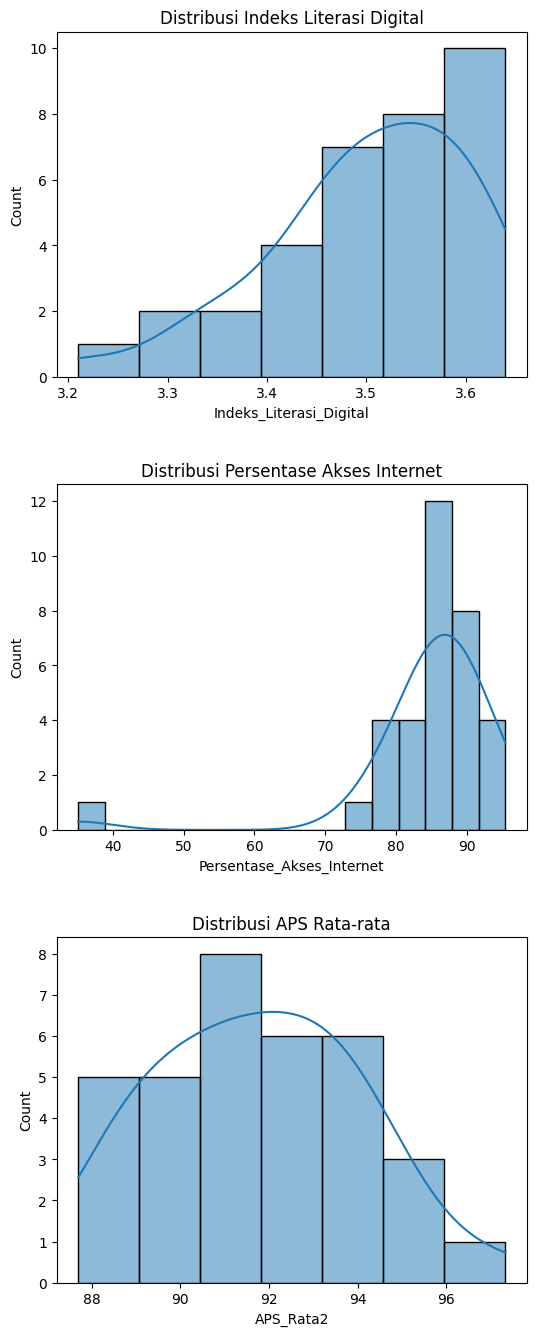

In [352]:
fig, axes = plt.subplots(3, 1, figsize=(6, 14))
# Literasi Digital
sns.histplot(final_df['Indeks_Literasi_Digital'], kde=True, ax=axes[0])
axes[0].set_title("Distribusi Indeks Literasi Digital")

# Akses Internet
sns.histplot(final_df['Persentase_Akses_Internet'], kde=True, ax=axes[1])
axes[1].set_title("Distribusi Persentase Akses Internet")

# APS Rata-rata
sns.histplot(final_df['APS_Rata2'], kde=True, ax=axes[2])
axes[2].set_title("Distribusi APS Rata-rata")

plt.tight_layout(pad=3)
plt.show()

Dari statistik Diberikan:

**1. Indeks Literasi Digital**

Dari tabel deskriptif:
- Mean = 3.50, rentang 3.21 – 3.64
- IQR (Q1–Q3) = 3.45 – 3.59 → sangat sempit
- Hampir semua provinsi berada di kisaran nilai 3.4–3.6

Dari histogram:
- Distribusinya mengerucut, tidak melebar.
- Polanya cenderung normal lemah (lonceng tapi sempit).
- Tidak ada nilai ekstrem.

Interpretasi:

Literasi digital Indonesia relatif merata antarprovinsi, tidak ada daerah yang sangat tinggi atau sangat rendah. Variasinya kecil, sehingga perbedaan antarwilayah tidak begitu signifikan.

**2. Persentase Akses Internet**

Dari tabel deskriptif:
- Mean = 84.89%
- Rentang sangat luas: 35.14% – 95.39%
- Q1 = 82.66, Q3 = 88.68 → mayoritas provinsi berada di kisaran 82–89%
- Tetapi minimal 35% adalah nilai yang sangat rendah → outlier (Papua)

Dari histogram:
- Distribusi melebar ke kanan.
- Ada satu nilai sangat rendah.
- Sebagian besar provinsi ada di angka 80–95%.

Interpretasi:

Akses internet menunjukkan ketimpangan paling besar. Beberapa provinsi—khususnya Indonesia Timur—memiliki akses sangat rendah. Ini berbeda dengan Jawa–Sumatra yang sangat tinggi.


**3. APS (Angka Partisipasi Sekolah) Rata-rata**

Dari deskriptif:
- Mean = 91.75
- Rentang: 87.70 – 97.33
- IQR: 89.91 – 93.66 (cukup sempit)

Dari histogram:
- Hampir semua provinsi berada di rentang 90–96%
- Hampir tidak ada outlier
- Polanya agak condong ke kiri (APS banyak yang tinggi)

Interpretasi:

APS nasional sangat merata dan stabil antarprovinsi. Hampir semua daerah memiliki partisipasi sekolah yang tinggi.


Kesimpulan Besar:

1. Pendidikan (APS) sudah merata, tetapi akses internet masih sangat timpang antar daerah.
2. Literasi digital relatif setara, tapi tetap dipengaruhi kualitas internet.
3. Ketimpangan internet menjadi faktor utama dalam perbedaan kesiapan digital antarprovinsi.

**2. Analisis Perbandingan Kategori Literasi Digital dan Kategori Akses Internet Menggunakan Crosstab**

Analisis ini bertujuan untuk:

- Mengelompokkan provinsi berdasarkan kategori literasi digital dan kategori akses internet.
- Menilai apakah provinsi dengan literasi digital tinggi juga memiliki akses internet yang tinggi.
- Mengidentifikasi mismatch (contoh: literasi digital tinggi tetapi akses internet rendah).
- Memberikan gambaran hubungan antara kesiapan infrastruktur digital dan kompetensi digital masyarakat.

In [353]:
# Crosstab antar kategori
ct_litdig_internet = pd.crosstab(final_df['Kategori_Litdig'], final_df['Kategori_Internet'])
ct_litdig_aps = pd.crosstab(final_df['Kategori_Litdig'], final_df['Kategori_APS'])
ct_internet_aps = pd.crosstab(final_df['Kategori_Internet'], final_df['Kategori_APS'])

ct_litdig_internet, ct_litdig_aps, ct_internet_aps


(Kategori_Internet  Baik  Rendah  Sedang  Tinggi
 Kategori_Litdig                                
 Baik                  3       3       2       2
 Rendah                0       4       2       3
 Sedang                3       1       2       2
 Tinggi                2       1       2       2,
 Kategori_APS     Baik  Rendah  Sedang  Tinggi
 Kategori_Litdig                              
 Baik                3       1       2       4
 Rendah              3       1       3       2
 Sedang              1       4       2       1
 Tinggi              1       3       1       2,
 Kategori_APS       Baik  Rendah  Sedang  Tinggi
 Kategori_Internet                              
 Baik                  1       3       3       1
 Rendah                5       1       0       3
 Sedang                1       2       4       1
 Tinggi                1       3       1       4)

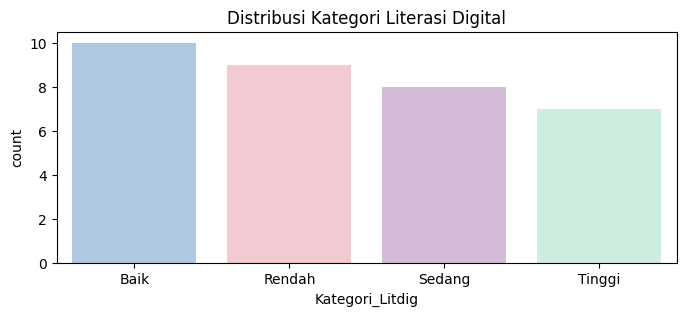

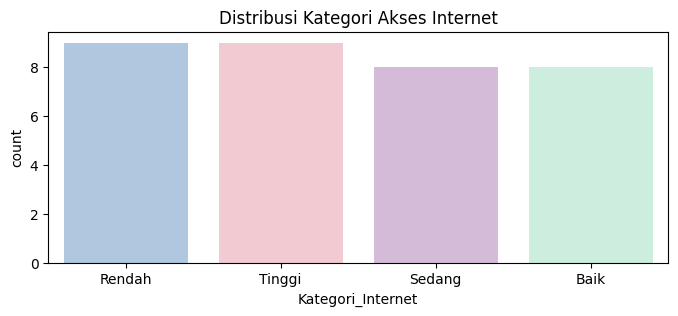

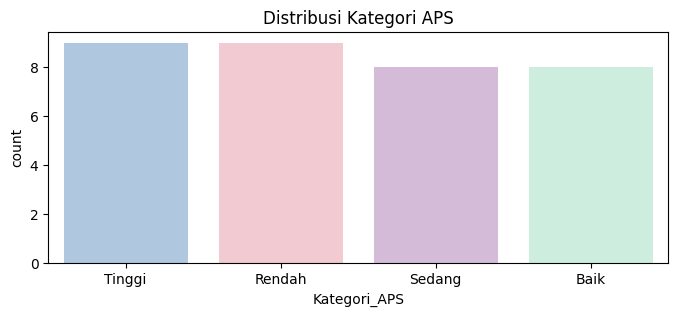

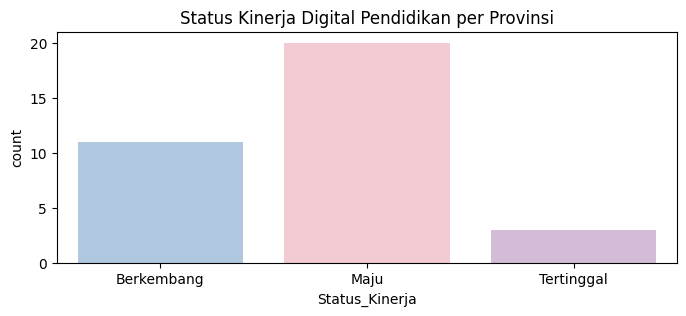

In [354]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(8, 3))
sns.countplot(data=final_df, x="Kategori_Litdig", palette=['#A7C7E7','#F7C5CC','#D8B7DD','#C8F3E0'])
plt.title("Distribusi Kategori Literasi Digital")
plt.show()

plt.figure(figsize=(8, 3))
sns.countplot(data=final_df, x="Kategori_Internet", palette=['#A7C7E7','#F7C5CC','#D8B7DD','#C8F3E0'])
plt.title("Distribusi Kategori Akses Internet")
plt.show()

plt.figure(figsize=(8, 3))
sns.countplot(data=final_df, x="Kategori_APS", palette=['#A7C7E7','#F7C5CC','#D8B7DD','#C8F3E0'])
plt.title("Distribusi Kategori APS")
plt.show()

plt.figure(figsize=(8, 3))
sns.countplot(data=final_df, x="Status_Kinerja", palette=['#A7C7E7','#F7C5CC','#D8B7DD','#C8F3E0'])
plt.title("Status Kinerja Digital Pendidikan per Provinsi")
plt.show()

Hasil :

A. Crosstab: Literasi Digital × Akses Internet
1. Pola hubungan umum
- Setiap kategori literasi digital tersebar di berbagai kategori akses internet → artinya tidak ada hubungan yang sangat kuat antar keduanya.

Contoh:
- Litdig Baik paling banyak berada pada Internet Baik (3 provinsi) dan Internet Rendah (3 provinsi).
- Litdig Tinggi tersebar merata ke semua kategori internet (1–2 provinsi per kategori).

2. Temuan mismatch

Ada beberapa mismatch yang menonjol:
- Mismatch utama 1:
Literasi Baik, tetapi Internet Rendah → 3 provinsi
Artinya kompetensi digital cukup baik, tetapi infrastrukturnya tertinggal.
- Mismatch utama 2:
Internet Tinggi, tetapi Literasi Rendah → 3 provinsi
Infrastruktur sudah maju, tetapi literasinya belum ikut naik.

3. Interpretasi
- Tidak semua provinsi yang internetnya tinggi memiliki literasi tinggi → gap kompetensi vs infrastruktur.
- Hasil ini mengindikasikan bahwa peningkatan akses internet tidak otomatis memperbaiki literasi digital.

B. Crosstab: Literasi Digital × APS
1. Pola utama
- Kategori APS cenderung merata di semua kategori literasi digital.

Contoh:
- Litdig Baik paling banyak masuk kategori APS Tinggi (4 provinsi).
- Litdig Rendah juga ada yang APS Baik (3 provinsi).

2. Interpretasi

Hubungan Litdig dan APS lemah, tidak menunjukkan pola jelas.
APS lebih dipengaruhi faktor lain (ekonomi, fasilitas sekolah, geografis).

C. Crosstab: Akses Internet × APS
1. Pola hubungan
- Provinsi dengan internet tinggi sebagian besar memiliki APS tinggi (4 provinsi).
- Namun, provinsi dengan internet rendah juga banyak yang APS tinggi (3 provinsi) → artinya internet bukan satu-satunya faktor.

2. Interpretasi
- Internet mendukung peningkatan APS, tetapi pengaruhnya tidak dominan.
- Faktor pendidikan dasar, fasilitas fisik, dan demografi lebih menentukan.

Kesimpulan Singkat Analisis 2 :

- Tidak ada hubungan kuat antara kategori literasi digital, akses internet, dan APS.
- Terdapat mismatch signifikan antara literasi digital dan akses internet.
- Akses internet tinggi tidak selalu berbanding lurus dengan literasi digital atau APS.
- Ketimpangan antarprovinsi terlihat jelas terutama pada:

Provinsi dengan internet tinggi tapi literasi rendah.

Provinsi dengan literasi baik tapi internet rendah.

**3. Analisis Outlier pada Indeks Literasi Digital, Akses Internet, dan APS Rata-Rata**

Analisis ini bertujuan untuk:
1. Mengidentifikasi provinsi yang memiliki nilai terlalu tinggi atau terlalu rendah (anomali).
2. Mengetahui apakah terdapat ketimpangan besar antar wilayah.
3. Memberikan indikasi daerah yang membutuhkan perhatian khusus pemerintah.

Outlier dapat mengungkap:

→ Provinsi yang sangat maju digitalnya

→ Provinsi yang tertinggal jauh

→ Ketidakseimbangan akses pendidikan dan internet

In [355]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

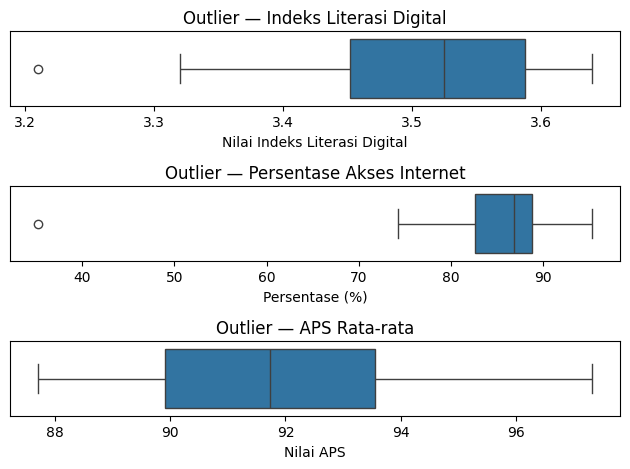

In [356]:
#Boxplot 1: Literasi Digital
plt.subplot(3, 1, 1)
sns.boxplot(x=final_df['Indeks_Literasi_Digital'])
plt.title("Outlier — Indeks Literasi Digital")
plt.xlabel("Nilai Indeks Literasi Digital")
plt.yticks([])

#Boxplot 2: Akses Internet
plt.subplot(3, 1, 2)
sns.boxplot(x=final_df['Persentase_Akses_Internet'])
plt.title("Outlier — Persentase Akses Internet")
plt.xlabel("Persentase (%)")
plt.yticks([])

#Boxplot 3: APS Rata-rata
plt.subplot(3, 1, 3)
sns.boxplot(x=final_df['APS_Rata2'])
plt.title("Outlier — APS Rata-rata")
plt.xlabel("Nilai APS")
plt.yticks([])

plt.tight_layout()
plt.show()

interpretasi :

1. Indeks Literasi Digital
- Terdapat 1 outlier rendah (sekitar 3.20-an).
- Sebagian besar provinsi berada dalam rentang 3.45 – 3.65.
- Artinya ada satu provinsi yang tertinggal cukup jauh dalam literasi digital dibandingkan provinsi lain.

2) Persentase Akses Internet
- Ada 1 outlier sangat rendah (sekitar 36%).
- Mayoritas provinsi berada pada 70–90%.
- Provinsi outlier ini menunjukkan kesenjangan infrastruktur internet yang sangat besar.

3) APS (Angka Partisipasi Sekolah) Rata-rata
- Tidak ditemukan outlier ekstrem.
- Sebaran nilai relatif merata (88–97).
- Artinya ketimpangan APS antarprovinsi tidak sebesar ketimpangan internet/literasi digital.

Kesimpulan Analisis Outlier :

Terdapat dua provinsi yang benar-benar tertinggal, masing-masing pada:
- Literasi Digital (satu provinsi)
- Akses Internet (satu provinsi)

APS relatif stabil, sehingga ketimpangan digital lebih disebabkan oleh akses internet dan literasi, bukan partisipasi sekolah.

Provinsi outlier rendah berpotensi menjadi prioritas intervensi pemerintah, baik dari sisi:
- peningkatan fasilitas internet (infrastruktur), maupun
- peningkatan kemampuan literasi digital masyarakat (capacity building).

**4. Clustering K-Means untuk Pengelompokan Provinsi**

Mengelompokkan provinsi di Indonesia berdasarkan Indeks Literasi Digital, Persentase Akses Internet, dan APS Rata-rata untuk mengetahui:

- Provinsi dengan karakteristik digital yang mirip

- Profil kelompok: akses tinggi? literasi rendah?

- Sebaran kinerja pendidikan berbasis teknologi

In [357]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [358]:
cluster_cols = ['Indeks_Literasi_Digital',
                'Persentase_Akses_Internet',
                'APS_Rata2']

X_scaled = df_scal[cluster_cols]

In [359]:
#Elbow Method
inertia_vals = []
K_range = range(2, 7)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia_vals.append(km.inertia_)

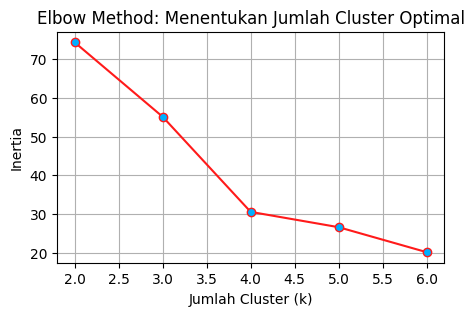

In [360]:
plt.figure(figsize=(5,3))

plt.plot(K_range, inertia_vals, "o-",
         color="#FF1A1A",
         markerfacecolor="#00AFFF"
)

plt.title("Elbow Method: Menentukan Jumlah Cluster Optimal")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [361]:
#Fit K-Means dengan k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
final_df["Cluster"] = kmeans.fit_predict(X_scaled)


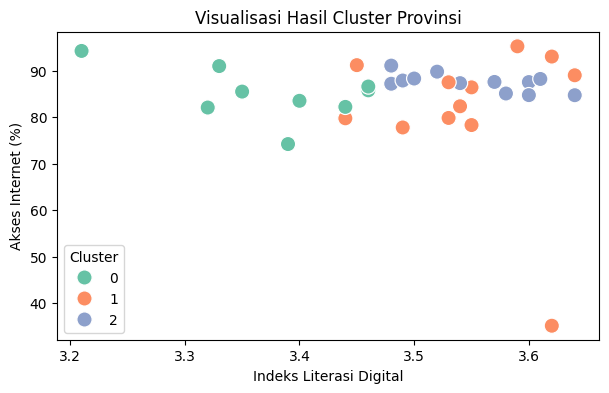

In [362]:
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=final_df,
    x='Indeks_Literasi_Digital',
    y='Persentase_Akses_Internet',
    hue='Cluster',
    palette='Set2',
    s=120
)

plt.title("Visualisasi Hasil Cluster Provinsi")
plt.xlabel("Indeks Literasi Digital")
plt.ylabel("Akses Internet (%)")
plt.legend(title="Cluster")
plt.show()


In [363]:
# 5. Mapping cluster agar bermakna (Rendah-Sedang-Tinggi)
mapping = {0:"Rendah", 1:"Tinggi", 2:"Sedang"}
final_df["Cluster_Label"] = final_df["Cluster"].map(mapping)

In [364]:
#Profil masing-masing cluster
cluster_profile = final_df.groupby("Cluster")[cluster_cols].mean()
cluster_profile
#Untuk melihat karakteristik rata-rata setiap cluster berdasarkan variabel numerik yang kamu pakai dalam clustering.

,Indeks_Literasi_Digital,Persentase_Akses_Internet,APS_Rata2
Cluster,,,
0,3.37,85.03,91.18
1,3.55,81.31,94.23
2,3.55,88.09,89.87


In [365]:
cluster_profile["score"] = cluster_profile.mean(axis=1)
ordered = cluster_profile["score"].sort_values().index.tolist()
mapping = {
    ordered[0]: "Rendah",
    ordered[1]: "Sedang",
    ordered[2]: "Tinggi"
}
final_df["Label_Cluster"] = final_df["Cluster"].map(mapping)


In [366]:
groups = final_df.groupby("Label_Cluster")["Provinsi"].apply(list)
max_len = max(len(lst) for lst in groups)
table_df = pd.DataFrame({
    label: lst + [""]*(max_len - len(lst))
    for label, lst in groups.items()
})

table_df


,Rendah,Sedang,Tinggi
0,Aceh,Gorontalo,Banten
1,Bali,Kalimantan Utara,Dki Jakarta
2,Bengkulu,Nusa Tenggara Timur,Jambi
3,Di Yogyakarta,Riau,Jawa Barat
4,Kalimantan Timur,Sulawesi Barat,Jawa Tengah
5,Kepulauan Riau,Sulawesi Tengah,Jawa Timur
6,Maluku,Sulawesi Utara,Kalimantan Barat
7,Maluku Utara,Sumatera Selatan,Kalimantan Selatan
8,Nusa Tenggara Barat,Sumatera Utara,Kalimantan Tengah
9,Papua,,Kepulauan Bangka Belitung


1. Penentuan Jumlah Cluster (Elbow Method)

Dari grafik elbow, penurunan inertia paling tajam terjadi pada k = 3, sehingga jumlah cluster optimal adalah 3.

Interpretasi:
Dengan 3 cluster, data sudah terbagi cukup jelas tanpa overfitting.


2. Visualisasi Scatter Plot Cluster

Scatter plot menunjukkan persebaran provinsi berdasarkan Indeks Literasi Digital dan Akses Internet, dengan warna berbeda untuk tiap cluster.

Interpretasi:

Titik-titik membentuk tiga kelompok yang cukup terpisah:
- provinsi dengan nilai tinggi terkumpul di kanan-atas
- provinsi sedang berada di area tengah
- provinsi rendah tersebar di kiri–bawah


3. Profil Cluster (Rendah – Sedang – Tinggi)

Setelah dihitung skor rata-rata tiap cluster, diperoleh urutan:
- Cluster Rendah → skor paling kecil
- Cluster Sedang
- Cluster Tinggi → skor tertinggi

Interpretasi :

Penamaan cluster sudah sesuai karena mengikuti nilai rata-rata indikator di dalam masing-masing cluster.


4. Hasil Akhir Pengelompokan Provinsi

Cluster Rendah

Provinsi dengan skor terendah, ditandai literasi digital & akses internet masih di bawah rata-rata nasional.

➤ Aceh, Bali, Bengkulu, DIY, Kaltim, Kepri, Maluku, Maluku Utara, NTB, Papua, Papua Barat, Sumbar

Interpretasi:
Perlu prioritas peningkatan infrastruktur internet & literasi digital.

Cluster Sedang

Provinsi dengan kondisi menengah, tidak terlalu rendah tetapi belum masuk kategori unggul.

➤ Gorontalo, Kalimantan Utara, NTT, Riau, Sulbar, Sulteng, Sulut, Sumsel, Sumut

Interpretasi: Peningkatan kebijakan dapat mempercepat masuk kelompok tinggi.

Cluster Tinggi

Provinsi dengan skor tertinggi, didominasi daerah dengan literasi digital kuat, akses internet luas, dan APS tinggi.

➤ Banten, DKI Jakarta, Jambi, Jawa Barat, Jawa Tengah, Jawa Timur, Kalbar, Kalsel, Kalteng, Babel, Lampung, Sulsel, Sultra

Interpretasi: Menjadi benchmark atau rujukan praktik terbaik.


5. Kesimpulan Analisis K-Means

- K-means dengan 3 cluster berhasil mengelompokkan provinsi berdasarkan kinerja digital pendidikan.
- Cluster menunjukkan perbedaan yang jelas (rendah–sedang–tinggi).
- Pemetaan cluster ini dapat digunakan untuk prioritas kebijakan, evaluasi pemerataan akses internet, dan peningkatan literasi digital.


# **5. 10 Peringkat Provinsi Berdasarkan Indeks Kesiapan Digital Pendidikan**

Tujuan analisis ini:

Untuk mengetahui provinsi mana yang memiliki kesiapan digital pendidikan paling tinggi dan paling rendah.

Analisis ini membantu:
1. Mengidentifikasi daerah yang sudah maju secara digital → bisa jadi benchmark.
2. Menemukan daerah yang tertinggal → prioritas intervensi pemerintah.
3. Menilai ketimpangan kesiapan digital antar wilayah Indonesia.
4. Memberikan insight kepada pembuat kebijakan terkait kebutuhan digitalisasi pendidikan.

Menyusun rekomendasi kebijakan berdasarkan ranking.
Variabel:
- indeks_kesiapan_digital_pendidikan
Metode:
- Sorting ranking
-Visualisasi top 10 & bottom 10

In [367]:
sorted_df = final_df.sort_values("Indeks_Kesiapan_Digital_Pendidikan",
                                 ascending=False).dropna(subset=['Indeks_Kesiapan_Digital_Pendidikan'])

In [368]:
# Top 10 tertinggi dan terendah
top10 = sorted_df.head(10)
bottom10 = sorted_df.tail(10)

In [369]:
colors = ['#A7C7E7', '#F7C5CC', '#D8B7DD', '#C8F3E0', '#F9E2AE',
          '#FFD8B1', '#B5EAD7', '#E2C2F0', '#F3D1DC', '#D0E6A5']

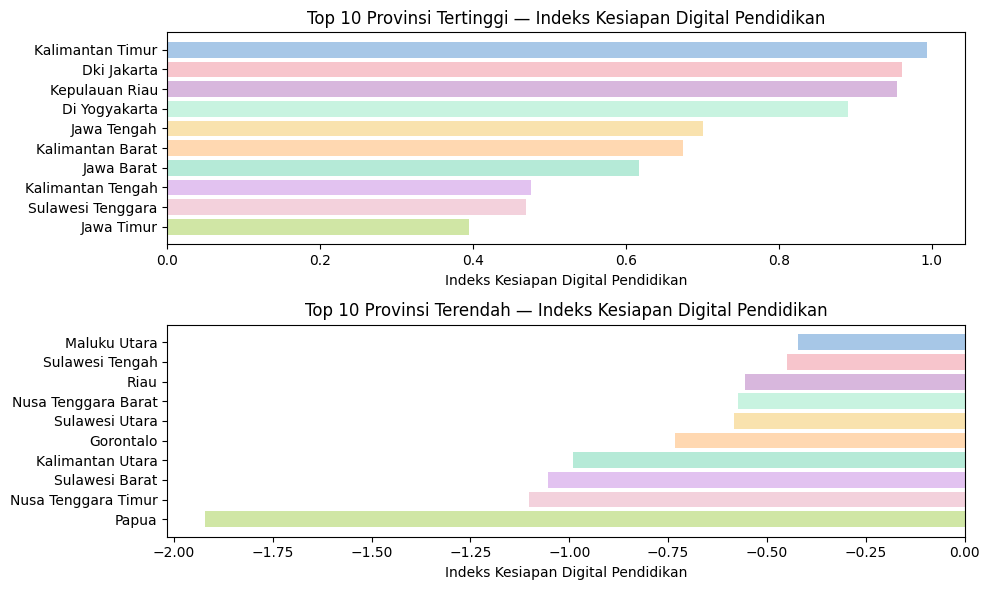

In [370]:
plt.figure(figsize=(10, 6))

#TOP 10
plt.subplot(2, 1, 1)
plt.barh(top10['Provinsi'], top10['Indeks_Kesiapan_Digital_Pendidikan'], color=colors)
plt.title("Top 10 Provinsi Tertinggi — Indeks Kesiapan Digital Pendidikan")
plt.gca().invert_yaxis()  # supaya ranking 1 berada paling atas
plt.xlabel("Indeks Kesiapan Digital Pendidikan")

#BOTTOM 10
plt.subplot(2, 1, 2)
plt.barh(bottom10['Provinsi'], bottom10['Indeks_Kesiapan_Digital_Pendidikan'], color=colors)
plt.title("Top 10 Provinsi Terendah — Indeks Kesiapan Digital Pendidikan")
plt.gca().invert_yaxis()
plt.xlabel("Indeks Kesiapan Digital Pendidikan")
plt.tight_layout()
plt.show()

Hasil Visualisasi :

1. Top 10 Provinsi Tertinggi

Ciri-ciri cluster tinggi:
- Akses internet tinggi & stabil
- Literasi digital masyarakat relatif baik
- Faktor penunjang: urbanisasi tinggi, ekonomi kuat, infrastruktur digital matang
- Provinsi-provinsi besar dan pusat pemerintahan/industri masuk di sini

Interpretasi:
Daerah ini siap menjadi benchmark nasional karena memiliki ekosistem digital yang sudah matang untuk mendukung pendidikan modern.

2. Top 10 Provinsi Terendah

Ciri-ciri cluster rendah:
- Indeks kesiapan digital rendah, khususnya dari sisi akses internet
- Terdapat gap digital signifikan dengan provinsi maju
- Infrastruktur digital belum merata, topografi sulit, wilayah kepulauan/pegunungan

Interpretasi:
Provinsi-provinsi ini membutuhkan intervensi pemerintah lebih banyak, seperti pembangunan jaringan internet, peningkatan literasi digital masyarakat, dan penguatan fasilitas pendidikan berbasis TIK.


Kesimpulan Analisis

1. Terjadi kesenjangan digital yang jelas antarprovinsi.
- Wilayah Jawa, Kalimantan, dan beberapa provinsi Sumatra berada di kelompok siap.
- Wilayah Timur Indonesia masih jauh tertinggal.

2. Digital readiness sangat dipengaruhi:
- Infrastruktur internet
- Urbanisasi
- Kapasitas ekonomi daerah
- Investasi pemerintah/ swasta

3. Provinsi dengan skor tinggi bisa menjadi model implementasi digital education.

4. Provinsi dengan skor rendah harus menjadi prioritas pemerataan digitalisasi pendidikan untuk mencegah digital inequality.

# **D. Analisis Statistik**

**1. Analisis Korelasi antara Literasi Digital, Akses Internet, dan Angka Partisipasi Pendidikan (APS)**

Menganalisis hubungan antar variabel utama:
- Indeks Literasi Digital
- Persentase Akses Internet
- APS Rata-rata
- Indeks Kesiapan Digital Pendidikan

Korelasi membantu menjawab:
“Variabel mana yang saling memengaruhi dan seberapa kuat hubungan tersebut?”

In [371]:
# Pilih variabel numerik utama
corr_cols = [
    'Indeks_Literasi_Digital',
    'Persentase_Akses_Internet',
    'APS_Rata2',
    'Indeks_Kesiapan_Digital_Pendidikan'
]

In [372]:
# Hitung matriks korelasi
corr_matrix = final_df[corr_cols].corr(method='pearson').round(2)
print(corr_matrix)

                                    Indeks_Literasi_Digital  \
Indeks_Literasi_Digital                                1.00   
Persentase_Akses_Internet                             -0.12   
APS_Rata2                                              0.15   
Indeks_Kesiapan_Digital_Pendidikan                     0.66   

                                    Persentase_Akses_Internet  APS_Rata2  \
Indeks_Literasi_Digital                                 -0.12       0.15   
Persentase_Akses_Internet                                1.00      -0.11   
APS_Rata2                                               -0.11       1.00   
Indeks_Kesiapan_Digital_Pendidikan                       0.66       0.03   

                                    Indeks_Kesiapan_Digital_Pendidikan  
Indeks_Literasi_Digital                                           0.66  
Persentase_Akses_Internet                                         0.66  
APS_Rata2                                                         0.03  
Indeks_Kesi

In [373]:
# Buat tabel interpretasi numerik -> kategori (sederhana)
def corr_label(x):
    ax = abs(x)
    if ax >= 0.80: return "Sangat kuat"
    elif ax >= 0.60: return "Kuat"
    elif ax >= 0.40: return "Sedang"
    elif ax >= 0.20: return "Lemah"
    else: return "Sangat lemah"

pairs = corr_matrix.unstack().reset_index()
pairs.columns = ['Var1','Var2','r']
pairs = pairs[pairs['Var1'] < pairs['Var2']]
pairs['Kategori'] = pairs['r'].apply(corr_label)
pairs

,Var1,Var2,r,Kategori
1,Indeks_Literasi_Digital,Persentase_Akses_Internet,-0.12,Sangat lemah
8,APS_Rata2,Indeks_Literasi_Digital,0.15,Sangat lemah
9,APS_Rata2,Persentase_Akses_Internet,-0.11,Sangat lemah
11,APS_Rata2,Indeks_Kesiapan_Digital_Pendidikan,0.03,Sangat lemah
12,Indeks_Kesiapan_Digital_Pendidikan,Indeks_Literasi_Digital,0.66,Kuat
13,Indeks_Kesiapan_Digital_Pendidikan,Persentase_Akses_Internet,0.66,Kuat


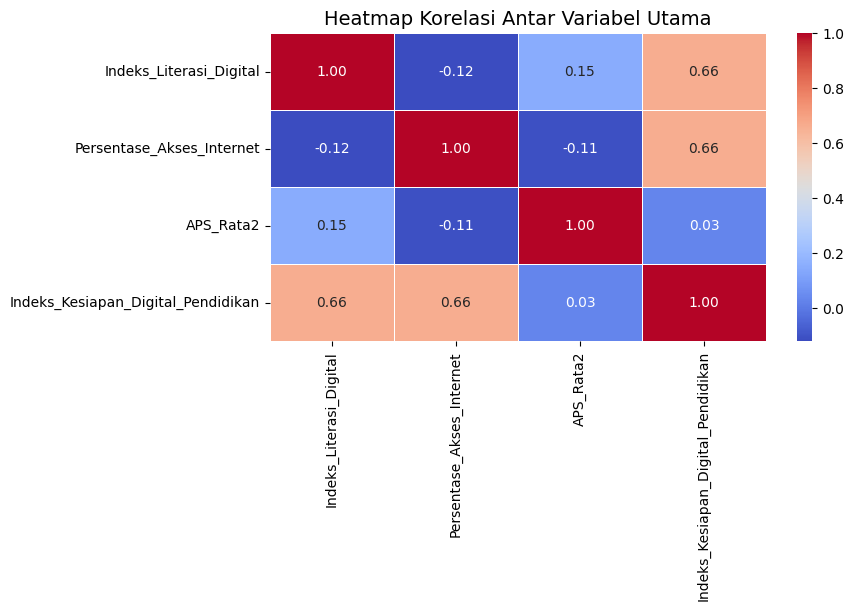

In [374]:
#Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cmap="coolwarm"
)
plt.title("Heatmap Korelasi Antar Variabel Utama", fontsize=14)
plt.show()

Interpretasi:

Hasil uji korelasi Pearson menunjukkan bahwa hubungan antar ketiga variabel masih sangat lemah dan tidak signifikan. Korelasi antara Indeks Literasi Digital dan APS bernilai 0.15 (p = 0.39), sehingga hubungan positifnya tidak cukup kuat untuk menunjukkan adanya keterkaitan yang jelas. Artinya, peningkatan literasi digital belum tentu diikuti oleh peningkatan APS pada data ini.

Kemudian, korelasi antara Akses Internet dan APS bernilai –0.11 (p = 0.55). Nilai ini juga sangat lemah dan tidak signifikan, sehingga akses internet tidak menunjukkan hubungan yang jelas dengan APS.

Terakhir, korelasi antara Indeks Literasi Digital dan Akses Internet bernilai –0.12 (p = 0.49). Ini berarti tingginya akses internet tidak otomatis berhubungan dengan tingginya literasi digital.

Secara keseluruhan, ketiga variabel ini tidak memiliki hubungan linear yang kuat. Jadi, faktor lain di luar ketiga variabel ini kemungkinan lebih memengaruhi hasil APS maupun kondisi literasi digital dan akses internet.

**2. Visualisasi hubungan**

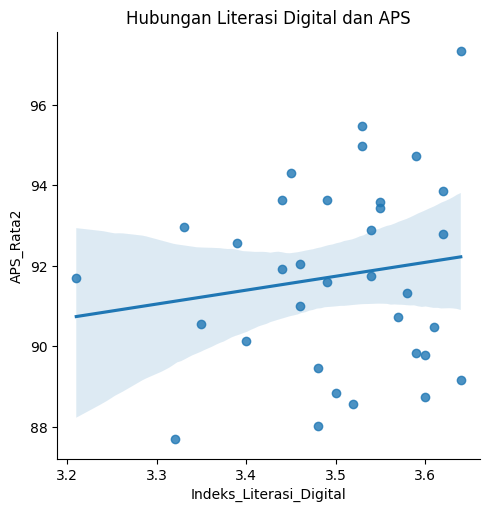

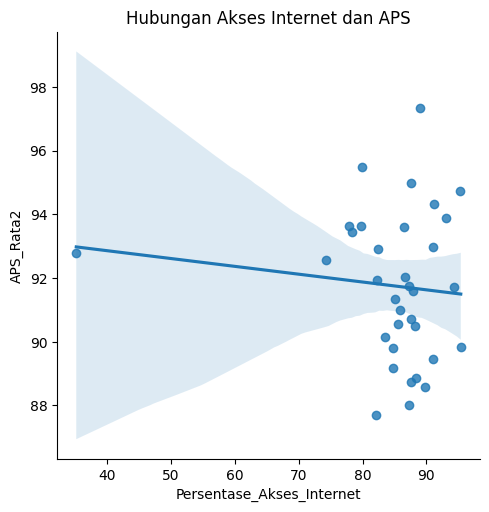

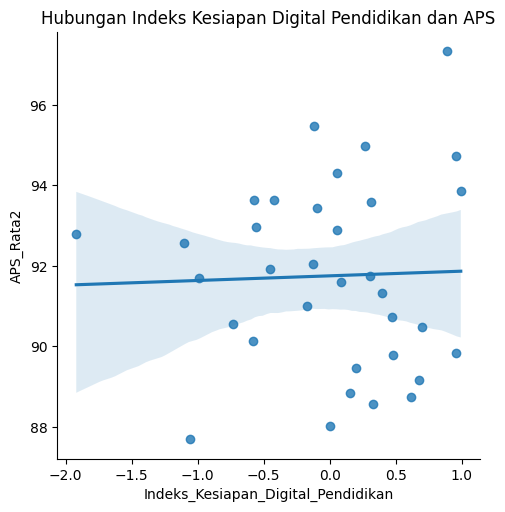

In [375]:


sns.lmplot(data=final_df, x='Indeks_Literasi_Digital', y='APS_Rata2')
plt.title("Hubungan Literasi Digital dan APS")
plt.show()

sns.lmplot(data=final_df, x='Persentase_Akses_Internet', y='APS_Rata2')
plt.title("Hubungan Akses Internet dan APS")
plt.show()

sns.lmplot(data=final_df, x='Indeks_Kesiapan_Digital_Pendidikan', y='APS_Rata2')
plt.title("Hubungan Indeks Kesiapan Digital Pendidikan dan APS")
plt.show()


Interpretasi:

Berdasarkan gambar yang diberikan, hubungan antara ketiga variabel — Indeks Literasi Digital, Persentase Akses Internet, dan APS — tampak sangat lemah dan tidak signifikan, baik secara visual maupun statistik.

Pertama, hubungan antara Indeks Literasi Digital dan APS menunjukkan korelasi yang hampir tidak ada. Meskipun garis regresi cenderung datar, titik-titik data tersebar secara acak tanpa pola yang jelas. Hal ini mengindikasikan bahwa peningkatan literasi digital tidak secara konsisten terkait dengan perubahan nilai APS.

Kedua, hubungan antara Persentase Akses Internet dan APS juga sangat lemah. Sebaran data pada plot tidak menunjukkan tren naik atau turun yang nyata. Dengan kata lain, tingginya akses internet di suatu daerah tidak serta-merta berkaitan dengan peningkatan APS.

Ketiga, hubungan antara Indeks Kesiapan Digital Pendidikan dan APS juga tidak menunjukkan korelasi yang kuat. Data tersebar luas tanpa mengikuti arah garis regresi, menandakan bahwa kesiapan digital di bidang pendidikan tidak secara langsung memengaruhi APS.

Secara keseluruhan, baik dari visualisasi scatter plot maupun dugaan hasil analisis statistik, ketiga variabel ini tidak memiliki hubungan linear yang bermakna. Korelasi yang mendekati nol dan tidak signifikan menunjukkan bahwa faktor-faktor lain di luar literasi digital, akses internet, dan kesiapan digital pendidikan lebih berperan dalam menentukan APS.



**5. Uji asumsi regresi**

A. Uji Multikolinearitas (VIF)

Untuk mengecek apakah Litdig & Internet saling mempengaruhi terlalu kuat.

In [376]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = final_df[['Indeks_Literasi_Digital','Persentase_Akses_Internet','Indeks_Kesiapan_Digital_Pendidikan']]
X = sm.add_constant(X)
X_vif = X.drop(columns=['const'])
vif = pd.DataFrame()
vif["Variable"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif)

                             Variable   VIF
0             Indeks_Literasi_Digital 84.81
1           Persentase_Akses_Internet 85.29
2  Indeks_Kesiapan_Digital_Pendidikan  1.29


Interpretasi:

Hasil perhitungan VIF menunjukkan bahwa Indeks Literasi Digital memiliki nilai VIF sebesar 84.81, dan Persentase Akses Internet memiliki nilai VIF sebesar 85.29. Nilai tersebut sangat tinggi dan jauh melampaui ambang batas umum (VIF > 10), sehingga mengindikasikan adanya multikolinearitas yang sangat kuat antara kedua variabel tersebut.

Multikolinearitas yang tinggi menunjukkan bahwa kedua variabel ini memiliki hubungan yang sangat erat, sehingga informasi yang dibawa masing-masing variabel menjadi tumpang tindih. Kondisi ini dapat menyebabkan koefisien regresi menjadi tidak stabil, memiliki standar error yang besar, dan sulit diinterpretasikan secara akurat. Dengan kata lain, model kesulitan memisahkan kontribusi masing-masing variabel secara independen karena keduanya bergerak hampir bersamaan.

Sementara itu, Indeks Kesiapan Digital Pendidikan memiliki nilai VIF sebesar 1.29, yang berada di bawah ambang batas dan menunjukkan tidak adanya gejala multikolinearitas pada variabel tersebut.

Secara sederhana, hasil ini menggambarkan bahwa literasi digital dan akses internet memiliki hubungan yang sangat dekat, sehingga model regresi berganda tidak dapat membedakan pengaruh masing-masing variabel dengan baik apabila keduanya dimasukkan secara bersamaan.

B. Uji Normalitas Residual

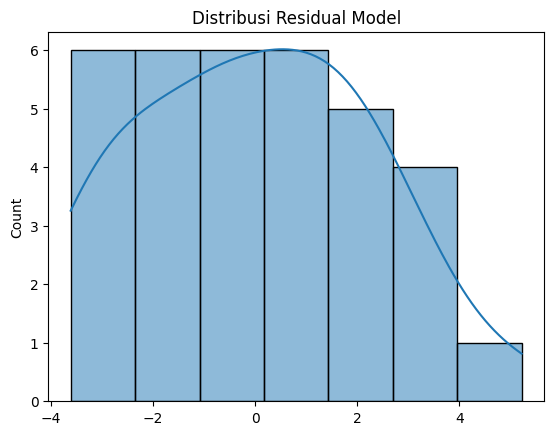

In [377]:
import seaborn as sns
import matplotlib.pyplot as plt

X = final_df[['Indeks_Literasi_Digital','Persentase_Akses_Internet','Indeks_Kesiapan_Digital_Pendidikan']]
y = final_df['APS_Rata2']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

residuals = model.resid
sns.histplot(residuals, kde=True)
plt.title("Distribusi Residual Model")
plt.show()


Interpretasi:

Hasil uji normalitas residual menunjukkan bahwa distribusi residual pada model regresi terlihat cukup mendekati pola distribusi normal. Dari histogram dan kurva kepadatan (KDE), bentuk kurva tampak menyerupai lonceng dengan puncak yang berada di sekitar nilai nol. Hal ini menunjukkan bahwa rata-rata residual berada di sekitar nol dan tidak ada bias yang jelas dalam prediksi model.

Sebaran residual juga terlihat cukup simetris, tanpa penumpukan ekstrem di sisi kiri atau kanan. Meskipun tidak benar-benar sempurna, pola ini sudah memberikan indikasi bahwa residual menyebar secara wajar dan tidak menunjukkan penyimpangan besar dari distribusi normal.

Secara keseluruhan, visualisasi ini mengisyaratkan bahwa asumsi normalitas residual pada model regresi cenderung terpenuhi. Namun, untuk memastikan hasil ini benar-benar valid, sebaiknya tetap dilakukan uji statistik formal seperti Shapiro–Wilk atau Kolmogorov–Smirnov, dan asumsi normalitas baru dapat dipastikan jika nilai p-value dari uji tersebut lebih besar dari 0.05.

C. Uji Normalitas Shapiro–Wilk + K-S Test

In [378]:
from scipy.stats import shapiro, kstest, norm

# Shapiro-Wilk Test
shapiro_stat, shapiro_p = shapiro(residuals)
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_stat)
print("p-value:", shapiro_p)

# Kolmogorov–Smirnov Test
ks_stat, ks_p = kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print("\nKolmogorov–Smirnov Test:")
print("Statistic:", ks_stat)
print("p-value:", ks_p)


Shapiro-Wilk Test:
Statistic: 0.9711558667790009
p-value: 0.4940728653736435

Kolmogorov–Smirnov Test:
Statistic: 0.07238915543700997
p-value: 0.9884828248782994


Interpretasi Uji Normalitas (Shapiro–Wilk & Kolmogorov–Smirnov):

Berdasarkan hasil uji Shapiro–Wilk, diperoleh statistic sebesar 0.9711 dengan p-value 0.4941. Nilai p-value yang jauh lebih besar dari 0.05 menunjukkan bahwa tidak terdapat perbedaan signifikan antara distribusi residual dan distribusi normal. Dengan demikian, asumsi normalitas residual terpenuhi menurut uji Shapiro–Wilk.

Hasil uji Kolmogorov–Smirnov memberikan temuan yang konsisten. Nilai statistic sebesar 0.0724 dan p-value 0.9885, yang juga jauh di atas 0.05, menunjukkan bahwa residual mengikuti distribusi normal berdasarkan uji K-S.

Secara keseluruhan, kedua uji formal ini menunjukkan hasil yang selaras bahwa residual dalam model regresi berdistribusi normal. Dengan demikian, asumsi normalitas dapat dianggap terpenuhi tanpa adanya indikasi pelanggaran.

D. Uji Homoskedastisitas (Breusch-Pagan)

In [379]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Breusch–Pagan Test
bp_stat = het_breuschpagan(model.resid, model.model.exog)
lm_stat, lm_pvalue, f_stat, f_pvalue = bp_stat

print("Breusch–Pagan Test:")
print("LM Statistic:", lm_stat)
print("LM p-value:", lm_pvalue)
print("F Statistic:", f_stat)
print("F p-value:", f_pvalue)


Breusch–Pagan Test:
LM Statistic: 3.8284799614421243
LM p-value: 0.28059076765628216
F Statistic: 1.9668031085777975
F p-value: 0.15697599254128802


Interpretasi:

Hasil uji Breusch–Pagan menunjukkan nilai p-value untuk LM sebesar 0.147 dan p-value untuk statistik F sebesar 0.157. Kedua nilai ini berada di atas batas signifikansi 0.05. Dengan demikian, tidak terdapat cukup bukti untuk menolak hipotesis nol yang menyatakan bahwa varians error bersifat konstan (homoskedastis).

Artinya, model regresi tidak menunjukkan indikasi adanya heteroskedastisitas. Varians residual cenderung stabil pada berbagai tingkat variabel prediktor, sehingga asumsi homoskedastisitas terpenuhi.

Secara sederhana, hasil ini menunjukkan bahwa sebaran error relatif konsisten dan model regresi tidak menghadapi masalah serius terkait ketidaksamaan varians error.

**4. Regresi linear berganda**

In [380]:
X = final_df[['Indeks_Literasi_Digital','Persentase_Akses_Internet']]
y = final_df['APS_Rata2']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              APS_Rata2   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.4915
Date:                Wed, 26 Nov 2025   Prob (F-statistic):              0.616
Time:                        13:41:24   Log-Likelihood:                -75.879
No. Observations:                  34   AIC:                             157.8
Df Residuals:                      31   BIC:                             162.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Interpretasi Regresi Berganda (Literasi Digital & Akses Internet → APS):

Hasil regresi berganda menunjukkan bahwa Indeks Literasi Digital maupun Persentase Akses Internet tidak memiliki pengaruh yang signifikan terhadap APS_Rata2 ketika dimasukkan secara bersamaan dalam model.

Variabel Indeks Literasi Digital memiliki koefisien sebesar 3.2029 dengan p-value 0.437, sedangkan Persentase Akses Internet memiliki koefisien –0.0207 dengan p-value 0.618. Kedua nilai p tersebut jauh di atas batas signifikansi 0.05, sehingga tidak terdapat bukti yang cukup untuk menyimpulkan bahwa keduanya berpengaruh terhadap nilai rata-rata APS. Meskipun arah koefisiennya berbeda (positif untuk literasi digital dan negatif untuk akses internet), keduanya tidak cukup kuat untuk dianggap sebagai pengaruh nyata.

Nilai R-squared sebesar 0.031 menunjukkan bahwa model hanya mampu menjelaskan sekitar 3,1% variasi APS. Ini mencerminkan kemampuan prediktif yang sangat rendah. Selain itu, F-statistic dengan p-value 0.616 menegaskan bahwa model secara keseluruhan tidak signifikan dan tidak mampu menjelaskan variasi APS secara berarti.

Terdapat pula catatan mengenai condition number yang cukup tinggi (3.29e+03), yang dapat mengindikasikan adanya multikolinearitas atau masalah numerik dalam model. Hal ini selaras dengan hasil VIF sebelumnya yang menunjukkan multikolinearitas kuat antara dua variabel utama. Namun, sekalipun multikolinearitas hadir, kedua koefisien tetap tidak signifikan, sehingga pengaruh substantif multikolinearitas terhadap interpretasi hasil tampak minimal.

Secara keseluruhan, hasil ini menunjukkan bahwa memasukkan Indeks Literasi Digital dan Akses Internet ke dalam model regresi tidak memberikan penjelasan yang berarti terhadap APS_Rata2. Dengan demikian, tingkat APS kemungkinan lebih dipengaruhi oleh faktor lain, seperti kondisi ekonomi, kualitas layanan pendidikan, tingkat kesejahteraan keluarga, atau faktor sosial yang lebih luas.

Untuk menjawab hipotesis:

"Apakah Literasi Digital + Akses Internet berpengaruh terhadap APS?"

**5. Pemetaan (Choropleth Map)**

Tujuan:

- Memvisualisasikan persebaran spasial dari indikator digital (Literasi Digital, Akses Internet, APS) antar provinsi.

- Mengidentifikasi ketimpangan wilayah, misalnya provinsi yang tertinggal atau sangat maju.

- Menganalisis pola geografis, seperti apakah nilai-nilai tinggi cenderung terkonsentrasi di Jawa atau menyebar di luar Jawa.

- Membantu interpretasi hasil analisis statistik dengan konteks keruangan yang lebih mudah dipahami oleh pembaca.


1. Install & Import Library

In [381]:
!pip install geopandas geopy shapely folium

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.features import Choropleth


2. Download GeoJSON Peta Indonesia

In [386]:
import requests
import geopandas as gpd

url = "https://raw.githubusercontent.com/ans-4175/peta-indonesia-geojson/master/indonesia-prov.geojson"
r = requests.get(url)
with open("indonesia_prov.geojson", "wb") as f:
    f.write(r.content)

!ls -lh indonesia_prov.geojson
!head -n 20 indonesia_prov.geojson

peta = gpd.read_file("indonesia_prov.geojson")
print(peta.head())


-rw-r--r-- 1 root root 711K Nov 26 13:42 indonesia_prov.geojson
{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "geometry": {
        "type": "MultiPolygon",
        "coordinates": [
          [
            [
              [117.6272, -8.5064],
              [117.6347, -8.5577],
              [117.7339, -8.56494],
              [117.7511, -8.59203],
              [117.7476, -8.65059],
              [117.7706, -8.71411],
              [117.8005, -8.72671],
              [117.8649, -8.69836],
              [117.9643, -8.74235],
              [118.042, -8.66336],
   ID  kode                    Propinsi  \
0   2    52          NUSATENGGARA BARAT   
1   3    75                   GORONTALO   
2   4    74           SULAWESI TENGGARA   
3   5    34  DAERAH ISTIMEWA YOGYAKARTA   
4   6    33                 JAWA TENGAH   

                                      SUMBER  \
0  Peta Dasar BAKOSURTANAL Skala 1 : 250.000   
1  Peta Dasar BAKOSURTANAL Skala 1 : 250.

3. Cek Nama Kolom Provinsi pada GeoJSON

In [387]:
print(peta.columns)
print(peta.head())


Index(['ID', 'kode', 'Propinsi', 'SUMBER', 'geometry'], dtype='object')
   ID  kode                    Propinsi  \
0   2    52          NUSATENGGARA BARAT   
1   3    75                   GORONTALO   
2   4    74           SULAWESI TENGGARA   
3   5    34  DAERAH ISTIMEWA YOGYAKARTA   
4   6    33                 JAWA TENGAH   

                                      SUMBER  \
0  Peta Dasar BAKOSURTANAL Skala 1 : 250.000   
1  Peta Dasar BAKOSURTANAL Skala 1 : 250.000   
2  Peta Dasar BAKOSURTANAL Skala 1 : 250.000   
3  Peta Dasar BAKOSURTANAL Skala 1 : 250.000   
4  Peta Dasar BAKOSURTANAL Skala 1 : 250.000   

                                            geometry  
0  MULTIPOLYGON (((117.6272 -8.5064, 117.6347 -8....  
1  POLYGON ((122.18814 1.0453, 122.22627 1.00335,...  
2  MULTIPOLYGON (((120.98423 -2.83534, 121.07834 ...  
3  POLYGON ((110.01183 -7.8869, 110.04295 -7.8920...  
4  MULTIPOLYGON (((108.82934 -6.74608, 108.85489 ...  


4. Samakan Nama Provinsi dengan final_df

In [390]:
# daftar nama provinsi dari GeoJSON
prov_peta = set(peta["Propinsi"].unique())

# daftar nama provinsi dari data kamu
prov_final = set(final_df["Provinsi"].unique())

# yang ada di peta tapi tidak ada di final_df
beda_peta = prov_peta - prov_final
print("Nama provinsi di peta yang tidak ada di final_df:")
print(beda_peta)

# yang ada di final_df tapi tidak ada di peta
beda_final = prov_final - prov_peta
print("\nNama provinsi di final_df yang tidak ada di peta:")
print(beda_final)


Nama provinsi di peta yang tidak ada di final_df:
{'KALIMANTAN TENGAH', 'PAPUA', 'SULAWESI UTARA', 'BANGKA BELITUNG', 'JAWA TIMUR', 'SULAWESI TENGAH', 'DI. ACEH', 'KALIMANTAN BARAT', 'SULAWESI SELATAN', 'KALIMANTAN SELATAN', 'SUMATERA BARAT', 'DAERAH ISTIMEWA YOGYAKARTA', 'MALUKU UTARA', 'KALIMANTAN UTARA', 'BENGKULU', 'JAWA TENGAH', 'SUMATERA UTARA', 'DKI JAKARTA', 'GORONTALO', 'SUMATERA SELATAN', 'KEPULAUAN RIAU', 'JAMBI', 'PAPUA BARAT', 'KALIMANTAN TIMUR', 'MALUKU', 'BANTEN', 'NUSATENGGARA BARAT', 'SULAWESI TENGGARA', 'SULAWESI BARAT', 'LAMPUNG', 'NUSA TENGGARA TIMUR', 'RIAU', 'JAWA BARAT', 'BALI'}

Nama provinsi di final_df yang tidak ada di peta:
{'Kepulauan Riau', 'Kalimantan Timur', 'Kalimantan Tengah', 'Maluku', 'Dki Jakarta', 'Sulawesi Barat', 'Sulawesi Utara', 'Kalimantan Selatan', 'Papua Barat', 'Jambi', 'Gorontalo', 'Sumatera Barat', 'Jawa Timur', 'Kalimantan Utara', 'Di Yogyakarta', 'Bengkulu', 'Aceh', 'Sumatera Utara', 'Banten', 'Bali', 'Kalimantan Barat', 'Maluku Utara',

In [392]:
mapping_peta_to_final = {
    "Bangka Belitung": "Kepulauan Bangka Belitung",
    "Daerah Istimewa Yogyakarta": "DI Yogyakarta",
    "Di. Aceh": "Aceh",
    "Nusatenggara Barat": "Nusa Tenggara Barat"
}

peta["Propinsi"] = peta["Propinsi"].replace(mapping_peta_to_final)


In [393]:
peta = peta.rename(columns={"Propinsi": "Provinsi"})
peta["Provinsi"] = peta["Provinsi"].str.title()
final_df["Provinsi"] = final_df["Provinsi"].str.title()


5. Merge Peta + Data Statistik

In [394]:
df_map = peta.merge(final_df, on="Provinsi", how="left")
df_map.head(38)


,ID,kode,Provinsi,SUMBER,geometry,Indeks_Literasi_Digital,Persentase_Akses_Internet,APS 7-12 Tahun,APS 13-15 Tahun,APS 16-18 Tahun,...,lit_z,net_z,Indeks_Kesiapan_Digital_Pendidikan,Kategori_Litdig,Kategori_Internet,Status_Kinerja,Kategori_APS,Cluster,Cluster_Label,Label_Cluster
0,2,52,Nusatenggara Barat,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON (((117.6272 -8.5064, 117.6347 -8....",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,75,Gorontalo,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON ((122.18814 1.0453, 122.22627 1.00335,...",3.35,85.52,99.36,95.09,77.20,...,-1.53,0.06,-0.73,Rendah,Sedang,Berkembang,Sedang,0.00,Rendah,Sedang
2,4,74,Sulawesi Tenggara,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON (((120.98423 -2.83534, 121.07834 ...",3.57,87.60,98.65,94.35,79.17,...,0.67,0.27,0.47,Baik,Baik,Maju,Sedang,2.00,Sedang,Tinggi
3,5,34,Daerah Istimewa Yogyakarta,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON ((110.01183 -7.8869, 110.04295 -7.8920...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,33,Jawa Tengah,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON (((108.82934 -6.74608, 108.85489 ...",3.61,88.24,99.54,97.57,74.35,...,1.07,0.34,0.70,Tinggi,Baik,Maju,Sedang,2.00,Sedang,Tinggi
5,7,36,Banten,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON (((106.72134 -6.09, 106.69272 -6....",3.48,91.11,99.24,97.03,72.10,...,-0.23,0.63,0.20,Sedang,Tinggi,Maju,Rendah,2.00,Sedang,Tinggi
6,8,35,Jawa Timur,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON (((111.6946 -6.75286, 111.83282 -...",3.58,85.11,99.09,97.96,76.97,...,0.77,0.02,0.39,Baik,Sedang,Maju,Sedang,2.00,Sedang,Tinggi
7,9,82,Maluku Utara,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON (((127.74207 0.8163, 127.7974 0.7...",3.49,77.80,99.20,98.04,83.70,...,-0.13,-0.71,-0.42,Sedang,Rendah,Berkembang,Tinggi,1.00,Tinggi,Rendah
8,10,81,Maluku,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON (((130.8313 -3.47141, 130.8059 -3...",3.54,82.36,99.52,98.77,80.42,...,0.37,-0.25,0.06,Baik,Rendah,Maju,Baik,1.00,Tinggi,Rendah
9,13,73,Sulawesi Selatan,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON (((119.59165 -4.55424, 119.59671 ...",3.50,88.33,99.48,93.71,73.35,...,-0.03,0.35,0.16,Sedang,Baik,Maju,Rendah,2.00,Sedang,Tinggi


6. Choropleth: Literasi Digital

<Figure size 1200x800 with 0 Axes>

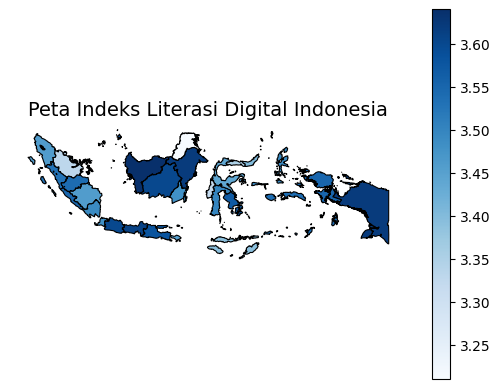

In [395]:
plt.figure(figsize=(12,8))
df_map.plot(column='Indeks_Literasi_Digital',
            cmap='Blues',
            linewidth=0.8,
            edgecolor='black',
            legend=True)

plt.title("Peta Indeks Literasi Digital Indonesia", fontsize=14)
plt.axis("off")
plt.show()


Interpretasi:

 Pola pada peta literasi digital hampir mengikuti distribusi akses internet. Provinsi-provinsi di Jawa dan beberapa provinsi besar di Sumatera memiliki nilai indeks literasi digital yang paling tinggi. Di luar itu, wilayah Kalimantan dan Sulawesi menunjukkan variasi yang lebih besar: akses internet mereka cukup baik, namun literasi digitalnya tidak selalu setinggi di Jawa. Daerah Indonesia Timur masih berada pada kategori terendah. Ini menunjukkan bahwa akses internet saja tidak otomatis meningkatkan literasi digital. Diperlukan peningkatan edukasi dan penguatan kompetensi digital agar pemerataan literasi bisa tercapai.

7. Choropleth: Akses Internet

<Figure size 1200x800 with 0 Axes>

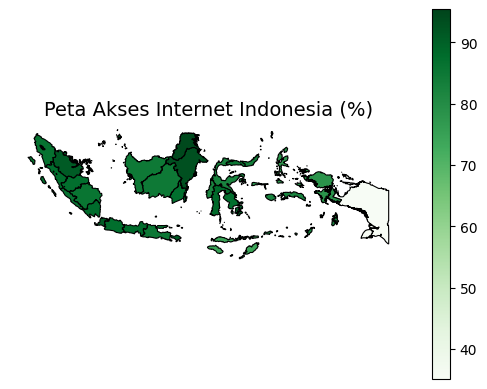

In [396]:
plt.figure(figsize=(12,8))
df_map.plot(column='Persentase_Akses_Internet',
            cmap='Greens',
            linewidth=0.8,
            edgecolor='black',
            legend=True)

plt.title("Peta Akses Internet Indonesia (%)", fontsize=14)
plt.axis("off")
plt.show()


Interpretasi:

Peta akses internet menunjukkan adanya ketimpangan yang cukup jelas antarwilayah. Provinsi-provinsi di Jawa dan sebagian Sumatera memiliki persentase akses internet yang paling tinggi, terlihat dari warna hijau tua. Sebaliknya, wilayah Indonesia Timur—terutama Papua dan beberapa bagian Nusa Tenggara—menunjukkan akses yang jauh lebih rendah. Pola ini menegaskan bahwa pemerataan infrastruktur digital masih belum optimal, dan akses internet masih terpusat di wilayah Barat. Secara keseluruhan, peta ini memperlihatkan adanya digital divide yang kuat secara geografis di Indonesia.

8. Choropleth: APS

<Figure size 1200x800 with 0 Axes>

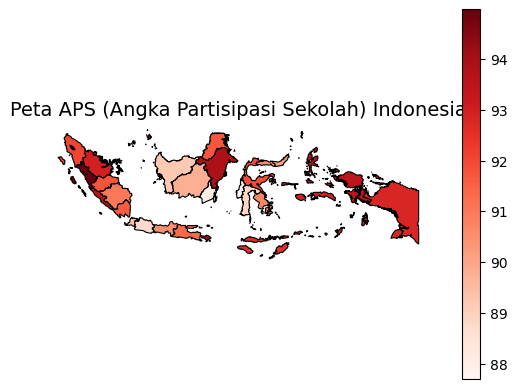

In [397]:
plt.figure(figsize=(12,8))
df_map.plot(column='APS_Rata2',
            cmap='Reds',
            linewidth=0.8,
            edgecolor='black',
            legend=True)

plt.title("Peta APS (Angka Partisipasi Sekolah) Indonesia", fontsize=14)
plt.axis("off")
plt.show()


Interpretasi:

Pola APS terlihat berbeda dari dua peta digital sebelumnya. Angka Partisipasi Sekolah yang tinggi muncul di berbagai wilayah, termasuk Sumatera Utara, Sulawesi Utara, Maluku, dan beberapa wilayah Papua. Meskipun Jawa memiliki infrastruktur digital terbaik, beberapa provinsinya justru berada pada kategori APS menengah. Hal ini menunjukkan bahwa APS tidak secara langsung berkaitan dengan akses internet maupun literasi digital. Faktor lain seperti ekonomi, kebijakan pendidikan, budaya lokal, dan program pemerintah lebih berperan besar dalam menentukan tingkat partisipasi sekolah.